In [15]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [16]:
#Loading dataset
df = pd.read_csv('HRAnalyticsProject.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df.shape

(1470, 35)

In [18]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

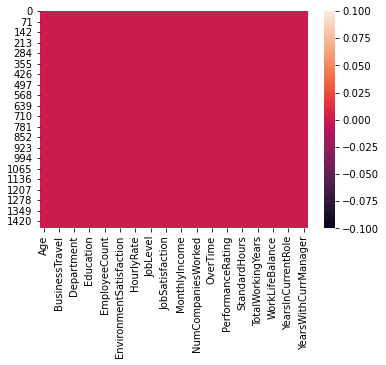

In [20]:
sns.heatmap(df.isnull())

there are no null values in dataset

In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# EDA Analysis

In [22]:
dfcor=df.corr()
dfcor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

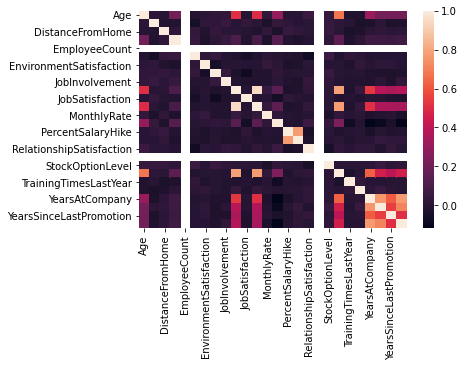

In [23]:
sns.heatmap(dfcor)

In [36]:
#Let's remove the strongly correlated variables
hr_data_uc = df[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']]
hr_data_uc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [45]:
hr_data_uc.shape

(1470, 11)

All the above columns are numeric

In [46]:
#Copy categorical data
hr_data_cat = df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']]
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


All above columns are categorical data

In [47]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()
#Lets replace yes and no with 0 & 1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [48]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In this way we replace other categorical variables with dummy values.

In [51]:
hr_data_final = pd.concat([hr_data_uc, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,3,61,2,2,2,4,1,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,4,92,2,1,3,2,0,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,40,3,1,2,4,1,...,0,0,0,0,0,1,0,1,1,0


<AxesSubplot:>

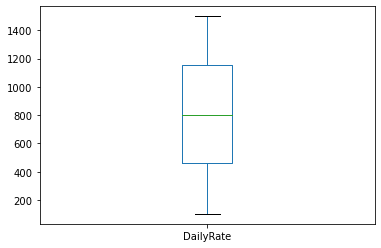

In [41]:
hr_data_final['DailyRate'].plot.box()

<AxesSubplot:xlabel='DailyRate', ylabel='JobSatisfaction'>

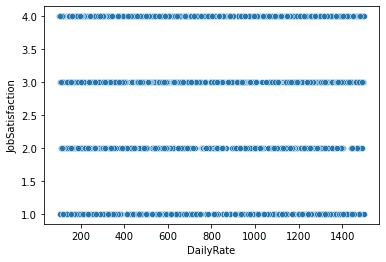

In [42]:
sns.scatterplot(hr_data_final['DailyRate'],hr_data_final['JobSatisfaction'],data=hr_data_final)

<AxesSubplot:xlabel='HourlyRate', ylabel='JobSatisfaction'>

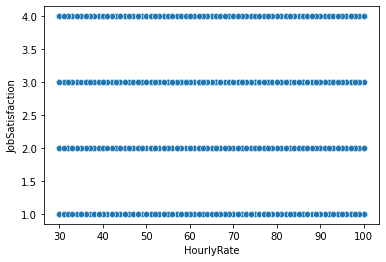

In [43]:
sns.scatterplot(hr_data_final['HourlyRate'],hr_data_final['JobSatisfaction'],data=hr_data_final)

In [50]:
hr_data_final.shape

(1470, 41)

<AxesSubplot:>

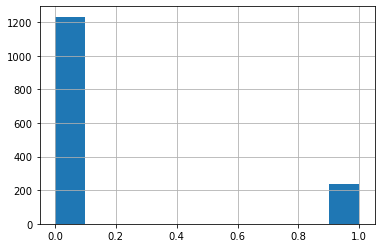

In [53]:
hr_data_final["Attrition"].hist(grid=True)

# Data Modelling

In [54]:
y = hr_data_final['Attrition']
x = hr_data_final.drop('Attrition', axis = 1)

In [56]:
x.shape

(1470, 40)

In [57]:
x.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TrainingTimesLastYear                0.553124
BusinessTravel_Non-Travel            2.632066
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely        -0.923992
Department_Human Resources           4.518824
Department_Research & Development   -0.646936
Department_Sales                     0.856158
EducationField_Human Resources       7.181112
EducationField_Life Sciences         0.356919
EducationField_Marketing             2.525783
EducationField_Medical               0.794118
EducationField_Other              

In [58]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Age                                 -0.007603
DailyRate                           -0.196160
DistanceFromHome                    -0.007468
EnvironmentSatisfaction             -0.205395
HourlyRate                          -0.106461
JobInvolvement                      -0.020365
JobLevel                             0.103624
JobSatisfaction                     -0.212815
RelationshipSatisfaction            -0.193634
StockOptionLevel                     0.087019
TrainingTimesLastYear                0.058058
BusinessTravel_Non-Travel            2.632066
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely        -0.923992
Department_Human Resources           4.518824
Department_Research & Development   -0.646936
Department_Sales                     0.856158
EducationField_Human Resources       7.181112
EducationField_Life Sciences         0.356919
EducationField_Marketing             2.525783
EducationField_Medical               0.794118
EducationField_Other              

In [59]:
df_new.shape

(1470, 40)

In [60]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df_new)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Age                                 -0.027493
DailyRate                           -0.042388
DistanceFromHome                     0.012294
EnvironmentSatisfaction             -0.043240
HourlyRate                          -0.023643
JobInvolvement                       0.125397
JobLevel                             0.077894
JobSatisfaction                     -0.048623
RelationshipSatisfaction            -0.037733
StockOptionLevel                     0.075143
TrainingTimesLastYear               -0.078892
BusinessTravel_Non-Travel            2.632066
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely        -0.923992
Department_Human Resources           4.518824
Department_Research & Development   -0.646936
Department_Sales                     0.856158
EducationField_Human Resources       7.181112
EducationField_Life Sciences         0.356919
EducationField_Marketing             2.525783
EducationField_Medical               0.794118
EducationField_Other              

In [61]:
x=df_new

In [62]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaledx=scalar.fit_transform(x)
scaledx

array([[ 0.52527557,  0.74104921, -1.48408478, ...,  0.        ,
        -1.59174553,  1.59174553],
       [ 1.27325481, -1.29637339,  0.23521265, ...,  0.        ,
         0.62824112, -0.62824112],
       [ 0.10670887,  1.40386775, -1.03025811, ...,  0.        ,
        -1.59174553,  1.59174553],
       ...,
       [-1.12535227, -1.6513551 , -0.44908545, ...,  0.        ,
        -1.59174553,  1.59174553],
       [ 1.27325481,  0.5473078 , -1.03025811, ...,  0.        ,
         0.62824112, -0.62824112],
       [-0.23184299, -0.41535457,  0.23521265, ...,  0.        ,
         0.62824112, -0.62824112]])

In [63]:
x=scaledx

In [64]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    mod=DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8321995464852607  on Random_state  131


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=131, test_size=0.1)

In [66]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Accuracy score of all models in one function

In [67]:
model=[DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is:
Accuracy Score: 0.7755102040816326
Confusion Matrix: [[106  19]
 [ 14   8]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.85      0.87       125
           1       0.30      0.36      0.33        22

    accuracy                           0.78       147
   macro avg       0.59      0.61      0.60       147
weighted avg       0.80      0.78      0.78       147



Accuracy score of SVC() is:
Accuracy Score: 0.8639455782312925
Confusion Matrix: [[123   2]
 [ 18   4]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.98      0.92       125
           1       0.67      0.18      0.29        22

    accuracy                           0.86       147
   macro avg       0.77      0.58      0.61       147
weighted avg       0.84      0.86      0.83       147



Accuracy score of RandomForestClassifier() is:
Accuracy Score: 0.8503

In [68]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [69]:
print(classification_report(y_test, pred_svc))
print('Accuracy Score:',accuracy_score(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       125
           1       0.67      0.18      0.29        22

    accuracy                           0.86       147
   macro avg       0.77      0.58      0.61       147
weighted avg       0.84      0.86      0.83       147

Accuracy Score: 0.8639455782312925


# Cross Validation

In [70]:
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())
cvs=cross_val_score(SVC(),x,y,cv=5)
print("cross validation score of SVC model :",cvs.mean())
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",cvs.mean())

cross validation score of DecisionTreeClassifier model : 0.7836734693877551
cross validation score of SVC model : 0.8571428571428571
cross validation score of RandomForestClassifier model : 0.8591836734693878


# Hyper Parameter Tuning

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print(accuracy_score(y_test,predict))

0.8639455782312925


In [75]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [76]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [77]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [78]:
Final_mod=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=7, criterion='entropy')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.03401360544217


In [79]:
import joblib
joblib.dump(Final_mod,"HRAnalyticsProject.pkl")

['HRAnalyticsProject.pkl']